In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math
from collections import Counter

In [2]:
df=pd.read_csv("C:\\Users\\91789\\Desktop\\Day1\\ClassNotesDeepesh\\LG_FINANCE_DOMAIN\\LGD_DATA.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
Ac_No                  15290 non-null int64
Age                    15290 non-null int64
Years of Experience    15290 non-null int64
Number of Vehicles     15290 non-null int64
Gender                 15290 non-null object
Married                15290 non-null object
Losses in Thousands    15290 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.2+ KB


In [9]:
df.shape

(15290, 7)

In [10]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


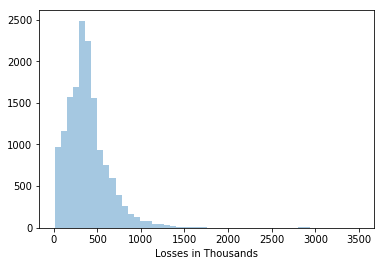

In [12]:
sns.distplot(df['Losses in Thousands'],kde=False,bins=50);

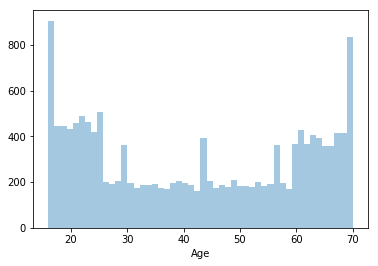

In [13]:
sns.distplot(df['Age'],kde=False,bins=50);

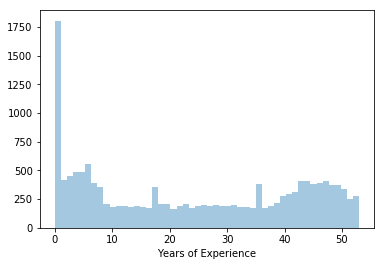

In [14]:
sns.distplot(df['Years of Experience'],kde=False,bins=50);

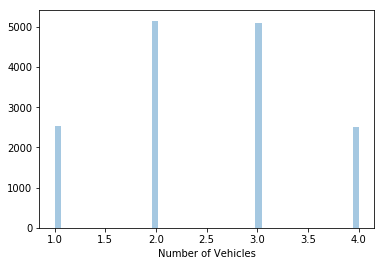

In [15]:
sns.distplot(df['Number of Vehicles'],kde=False,bins=50);

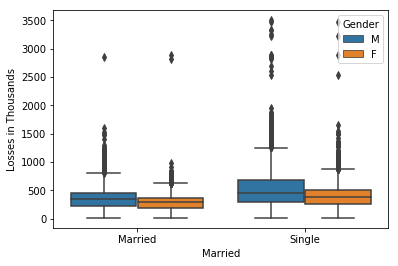

In [20]:
sns.boxplot(x='Married',y='Losses in Thousands',data=df,hue='Gender');
#hue is used to use different colors for categories of gender
#median line of single_male is associated with more Losses compared to median line of Married_Male

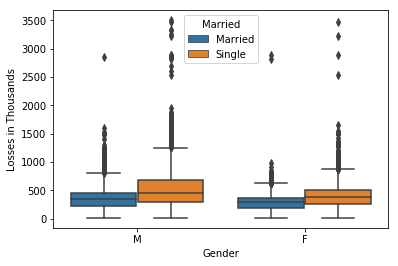

In [118]:
sns.boxplot(x='Gender',y='Losses in Thousands',data=df,hue='Married');

In [22]:
df.corr()
#finds correlation only between numerical variables

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
Ac_No,1.000000,0.008291,0.008437,-0.003056,-0.000794
Age,0.008291,1.000000,0.997161,0.008366,-0.442962
Years of Experience,0.008437,0.997161,1.000000,0.008545,-0.442115
Number of Vehicles,-0.003056,0.008366,0.008545,1.000000,-0.011553
Losses in Thousands,-0.000794,-0.442962,-0.442115,-0.011553,1.000000


In [16]:
dummy_var1=pd.get_dummies(df['Gender'],drop_first=True)
dummy_var2=pd.get_dummies(df['Married'],drop_first=True)

In [120]:
dummy_var.head()
dummy_var2.head()
type(dummy_var1)
type(df)

pandas.core.frame.DataFrame

In [18]:
df['Married'].nunique()

2

In [20]:
df_new=pd.concat([df,dummy_var1,dummy_var2],axis=1)

In [21]:
df_new.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,M,Single
0,150024,24,5,1,M,Married,203.319595,1,0
1,144880,31,10,1,F,Single,402.197302,0,1
2,133742,56,37,1,M,Married,553.132096,1,0
3,151282,52,31,1,F,Married,292.430579,0,0
4,174407,20,3,1,M,Single,246.540576,1,1


In [22]:
df_new2=df_new.drop(['Gender','Married'],axis=1)

In [23]:
df_new2.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,M,Single
0,150024,24,5,1,203.319595,1,0
1,144880,31,10,1,402.197302,0,1
2,133742,56,37,1,553.132096,1,0
3,151282,52,31,1,292.430579,0,0
4,174407,20,3,1,246.540576,1,1


In [33]:
x=df_new2[['Age','Number of Vehicles','M','Single']]
x.head(1)

,Age,Number of Vehicles,M,Single
0,24,1,1,0


In [35]:
y=df_new2['Losses in Thousands']
y.head(1)

0    203.319595
Name: Losses in Thousands, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm=LinearRegression()

In [39]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
print(lm.intercept_)

539.6565230110674


In [41]:
print(lm.coef_)

[ -6.14900704  -1.79059246  97.23493268 136.7922503 ]


In [42]:
from sklearn import metrics

In [43]:
pred=lm.predict(x_test)

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(y_test,pred)

0.29505257544943864

In [47]:
print(metrics.mean_absolute_error(y_test,pred))

148.50819212153985


In [48]:
from statsmodels.api import add_constant

In [50]:
x2=add_constant(x_train)

In [52]:
lm=sm.OLS(y_train,x2)

In [53]:
lm2=lm.fit()

In [55]:
lm2.pvalues

const                  0.000000e+00
Age                    0.000000e+00
Number of Vehicles     4.052234e-01
M                     1.470589e-121
Single                6.953054e-233
dtype: float64

In [57]:
print(lm2.summary())

                             OLS Regression Results                            
Dep. Variable:     Losses in Thousands   R-squared:                       0.305
Model:                             OLS   Adj. R-squared:                  0.304
Method:                  Least Squares   F-statistic:                     1171.
Date:                 Sun, 08 Sep 2019   Prob (F-statistic):               0.00
Time:                         05:24:23   Log-Likelihood:                -72503.
No. Observations:                10703   AIC:                         1.450e+05
Df Residuals:                    10698   BIC:                         1.451e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                539.6

In [58]:
df_new2.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,M,Single
0,150024,24,5,1,203.319595,1,0
1,144880,31,10,1,402.197302,0,1
2,133742,56,37,1,553.132096,1,0
3,151282,52,31,1,292.430579,0,0
4,174407,20,3,1,246.540576,1,1


In [87]:
df_new2['AgeCategory']=['Young' if df_new2['Age'][i]<=28 else 'MiddleAged' if 28<df_new2['Age'][i]<58 else 'old' for i in range(len(df_new2))]
df_new2['Logy']=map(math.log,df_new2['Losses in Thousands'])
dummy_var3=pd.get_dummies(df_new2['AgeCategory'],drop_first=True)
df_new3=pd.concat([df_new2,dummy_var3],axis=1)
df_new3.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,M,Single,AgeCategory,Logy,Young,old
0,150024,24,5,1,203.319595,1,0,Young,<map object at 0x0000018994893978>,1,0
1,144880,31,10,1,402.197302,0,1,MiddleAged,<map object at 0x0000018994893978>,0,0
2,133742,56,37,1,553.132096,1,0,MiddleAged,<map object at 0x0000018994893978>,0,0
3,151282,52,31,1,292.430579,0,0,MiddleAged,<map object at 0x0000018994893978>,0,0
4,174407,20,3,1,246.540576,1,1,Young,<map object at 0x0000018994893978>,1,0


In [59]:
len(df_new2)

15290

In [63]:
df_new2['Age'].describe()

count    15290.000000
mean        42.328254
std         18.280511
min         16.000000
25%         24.000000
50%         42.000000
75%         61.000000
max         70.000000
Name: Age, dtype: float64

In [73]:
Counter(df_new2['AgeCategory'])

Counter({'Young': 5157, 'MiddleAged': 5425, 'old': 4708})

In [74]:
df_new2['AgeCategory'].nunique()

3

In [90]:
x=df_new3[['Age','Number of Vehicles','M','Single','Young','old']]

In [105]:
y=df_new3['Losses in Thousands']

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [107]:
lm=LinearRegression()

In [108]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [111]:
pred=lm.predict(x_test)
metrics.mean_absolute_error(y_test,pred)
print(r2_score(y_test, pred))
# the r2 has improved
print(metrics.mean_absolute_error(y_test,pred))

0.31534598323198115
144.08099804253615


In [114]:
print('intercept is:',lm.intercept_)
print('b values are:',lm.coef_)

intercept is: 389.9539168135896
b values are: [  -2.02248475   -1.02058428   96.46811077  136.57000324   54.18510989
 -144.87719205]
